In [400]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

## Data loading and first analysis

In [23]:
mat = pd.read_csv('student-mat.csv', sep= ';')
mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [24]:
mat.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,395,2,GP,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,395,2,F,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,395,NaN,NaN,NaN,16.6962,1.27604,15,16,17,18,22
address,395,2,U,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,395,2,GT3,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,395,2,T,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,395,NaN,NaN,NaN,2.74937,1.09474,0,2,3,4,4
Fedu,395,NaN,NaN,NaN,2.52152,1.0882,0,2,2,3,4
Mjob,395,5,other,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,395,5,other,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN


no missing values

a lot of nominal variables with 2 distinct values. Seems that we can transform it to dummies

C:\Users\Den\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


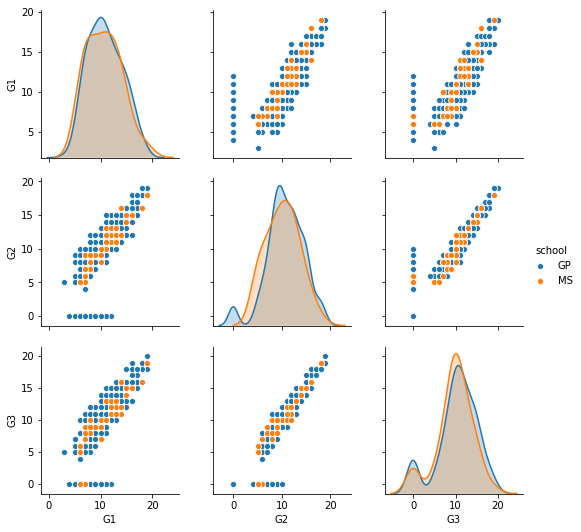

In [25]:
sns.pairplot(mat[['G1','G2','G3','school']], hue="school")

In [26]:
mat[((mat['G1'] > 0) & (mat['G2'] == 0)) | ((mat['G2'] > 0) & (mat['G3'] == 0))]['school'].value_counts()

GP    34
MS     4
Name: school, dtype: int64

Students from GP got 0 mark more frequently, than from MS

Ok, we need to predict G1, so variables G2,G3 should be deleted because they are from "future"

In [27]:
mat.drop("G2", axis=1, inplace=True)
mat.drop("G3", axis=1, inplace=True)
mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,5
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,7
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,6
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,5,4,2,1,2,5,10,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,no,4,4,4,1,1,3,0,12
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,no,4,1,4,1,1,1,6,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,no,4,2,2,1,1,1,0,16
9,GP,M,15,U,GT3,T,3,4,other,other,...,yes,no,5,5,1,1,1,5,0,14


There are a lot of different features, let's devide them into groups 

In [28]:
mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1'],
      dtype='object')

In [43]:
student_feat = ['sex', 'age', 'reason', 'nursery','higher','romantic' ]
place = ['school','address','traveltime','internet']
fam_feat = ['famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian','famrel']
study_feat = ['studytime', 'failures','schoolsup', 'famsup', 'paid','activities']
study_style_feat = ['freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

In [44]:
len(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
'Walc', 'health', 'absences'])

30

In [45]:
#to check we didn't forget any variable
len(student_feat + place + fam_feat + study_feat + study_style_feat)

30

In [49]:
mat_student_feat = pd.get_dummies(mat[student_feat], drop_first=True)

In [50]:
pd.get_dummies(mat[place])

,traveltime,school_GP,school_MS,address_R,address_U,internet_no,internet_yes
0,2,1,0,0,1,1,0
1,1,1,0,0,1,0,1
2,1,1,0,0,1,0,1
3,1,1,0,0,1,0,1
4,1,1,0,0,1,1,0
5,1,1,0,0,1,0,1
6,1,1,0,0,1,0,1
7,2,1,0,0,1,1,0
8,1,1,0,0,1,0,1
9,1,1,0,0,1,0,1


In [ ]:
mat_place

In [361]:
mat_dummies = pd.get_dummies(mat)
mat_dummies.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1',
       'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no',
       'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes',
       'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no',
       'internet_yes', 'romantic_no', 'romantic_yes'],
      dtype='object')

In [362]:
#drop k-th category for each variable 
mat_dummies.drop([ 'school_MS','sex_M','address_U','famsize_LE3','Pstatus_T',\
                  'Mjob_other','Fjob_other','reason_other','guardian_other',\
                 'schoolsup_no','famsup_no','paid_no','activities_no','nursery_no'\
                 ,'higher_no','internet_no','romantic_no'], axis=1, inplace=True)

In [56]:
mat_dummies.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1',
       'school_GP', 'sex_F', 'address_R', 'famsize_GT3', 'Pstatus_A',
       'Mjob_at_home', 'Mjob_health', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

## Vizualization part

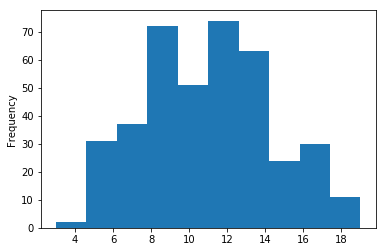

In [65]:
mat_dummies['G1'].plot(kind='hist',sharex=True)

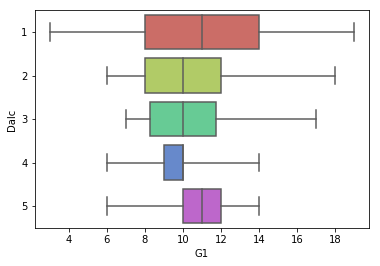

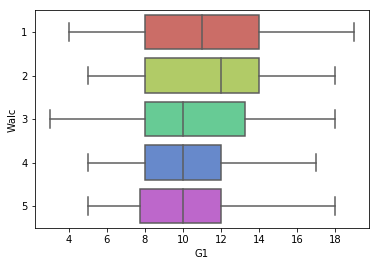

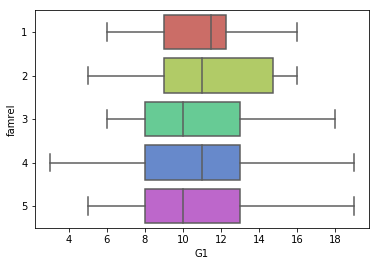

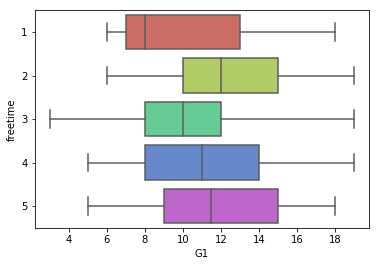

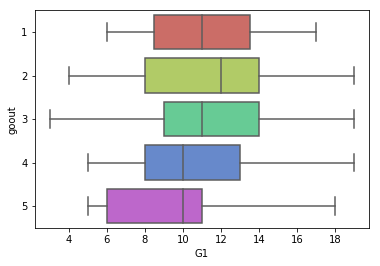

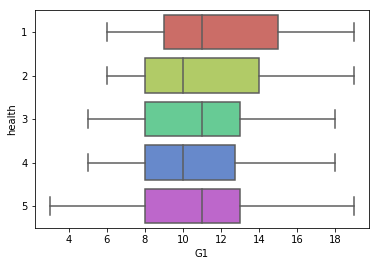

In [142]:
for var in ['Dalc','Walc','famrel','freetime','goout','health']:
    sns.boxplot(x=mat_dummies['G1'], y=mat_dummies[var],
            whis="range", palette="hls",orient='h')
    plt.show()

some conclusions:

* if student drinks a lot in weekdays (5), he will not take G1 higher than 14 points
* between lower alcohol concumption groups (1,2,3) in workdays there are wide range of students both types - successful and unsuccessful students
* such dependence doesn't work for alcohol consumption in weekends. From graph we see that there isn't correlation between alcohol consumption in weeends and G1
* students with freetime = 1 have only 8 points in median at G1 , which is the lowest rate
* the higher goout variable, the lower G1 grade in median students have 

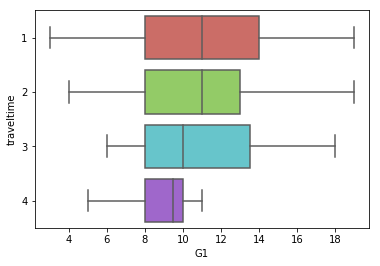

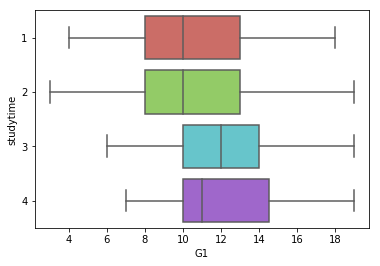

In [146]:
for var in ['traveltime','studytime']:
    sns.boxplot(x=mat_dummies['G1'], y=mat_dummies[var],
            whis="range", palette="hls",orient='h')
    plt.show()

some conclusions:

* lower traveltime - lower G1
* higher studytime - higher G1

In [363]:
vars_dummies_to_barchart = ['Pstatus_A','activities_yes','address_R','famsize_GT3','famsup_yes','higher_yes', 'internet_yes'\
                    , 'nursery_yes', 'paid_yes','romantic_yes', 'school_GP', 'schoolsup_yes', 'sex_F']

C:\Users\Den\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


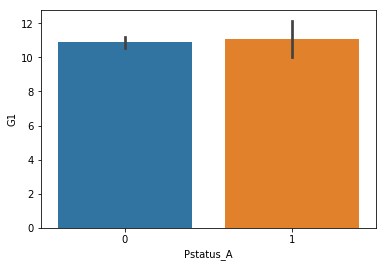

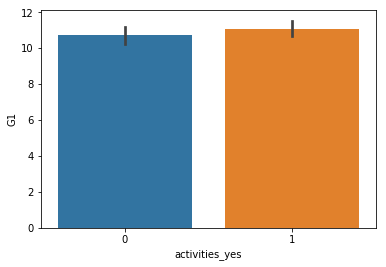

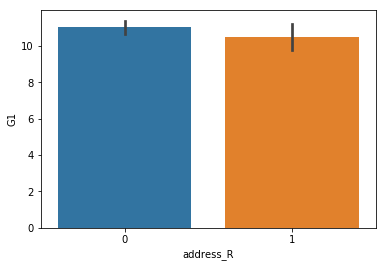

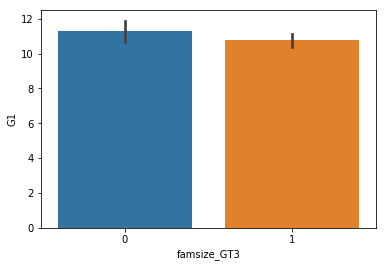

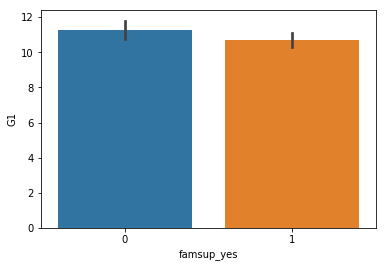

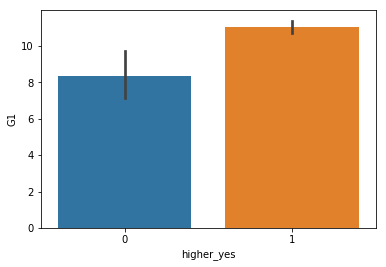

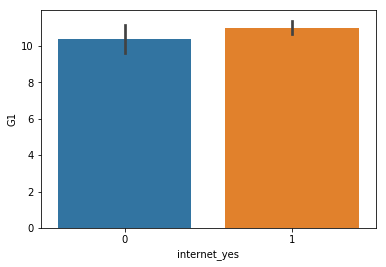

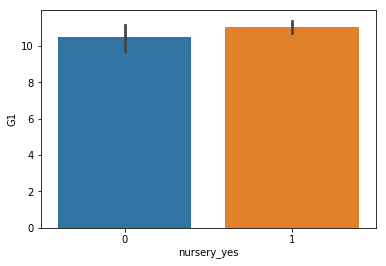

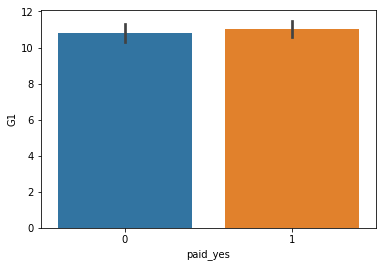

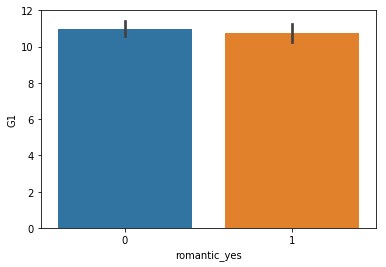

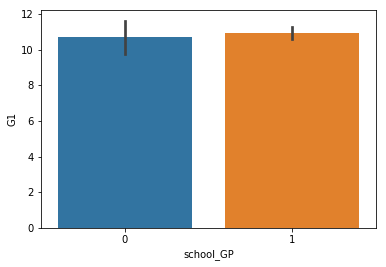

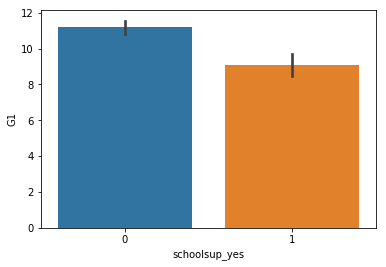

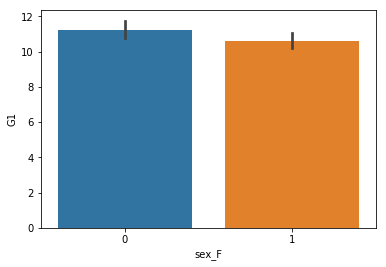

In [154]:
for var in vars_dummies_to_barchart:
    sns.barplot(x=mat_dummies[var], y=mat_dummies['G1'],orient='v')
    plt.show()

some conclusions:

* students with variable Higher = 1 (wants to take higher education) shows higher G1 marks 
* students with schoolsup = 1 have lower G1, because some low-skills students need additional support from school. Interesting thing that there isn't such correlation with "Family support". 

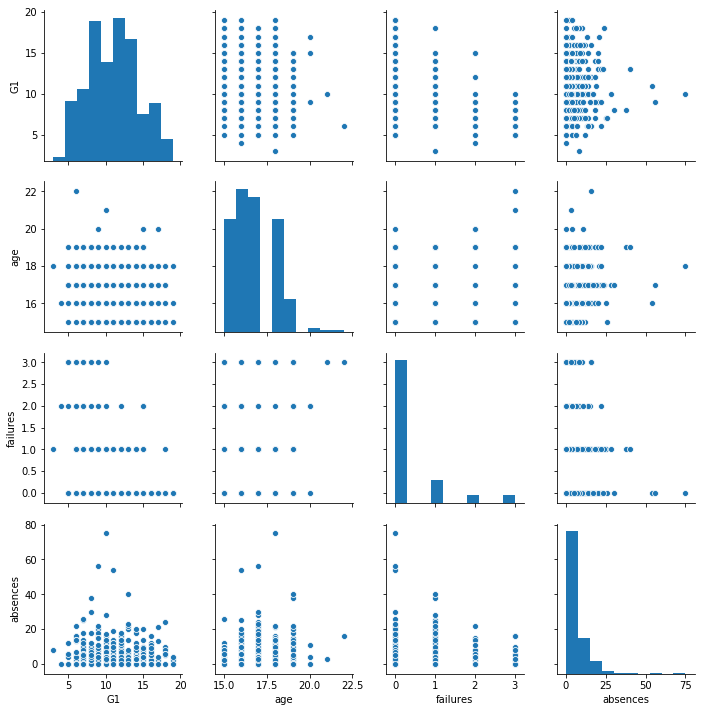

In [157]:
sns.pairplot(mat_dummies[['G1','age', 'failures','absences']])

some conclusions:

* absences doesn't affect on G1 (surprisingly)
* more number of failures leads to less G1

## Modelling part

### Let's make lasso regression for variable selection

In [364]:
from sklearn import linear_model
reg_lasso = linear_model.Lasso(alpha=0.01,random_state=18)
reg_lasso.fit(mat_dummies[mat_dummies.columns.difference(['G1'])],mat_dummies['G1']) 

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=18,
   selection='cyclic', tol=0.0001, warm_start=False)

In [365]:
print('Variance score: %.2f' % r2_score(mat_dummies['G1'], reg_lasso.predict(mat_dummies[mat_dummies.columns.difference(['G1'])])))

Variance score: 0.33


In [366]:
coef_lasso = pd.DataFrame(data=[mat_dummies[mat_dummies.columns.difference(['G1'])].columns, reg_lasso.coef_]).T
coef_lasso.columns=['variable','coef']

In [367]:
coef_lasso.sort_values(by=['coef'],ascending=False)

,variable,coef
5,Fjob_teacher,1.93523
8,Mjob_health,1.60754
9,Mjob_services,1.19366
26,higher_yes,0.93861
2,Fjob_at_home,0.830702
7,Mjob_at_home,0.605735
37,studytime,0.601423
32,reason_reputation,0.394006
21,freetime,0.240264
1,Fedu,0.185248


variables *Pstatus_A* *activities_yes* *school_GP* *Mjob_teacher* *Fjob_services* *reason_course* *nursery_yes* have  coef ~ 0, so we can remove them from next modelling part

## Ridge regression

In [368]:
vars_to_remove = ['Pstatus_A', 'activities_yes', 'school_GP', 'Mjob_teacher', 'Fjob_services', 'reason_course', 'nursery_yes']

In [369]:
vars_to_remove.append('G1')

In [370]:
from sklearn import linear_model
reg_ridge = linear_model.Ridge(alpha=2,random_state=18)
reg_ridge.fit(mat_dummies[mat_dummies.columns.difference(vars_to_remove)],mat_dummies['G1']) 

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=18, solver='auto', tol=0.001)

In [371]:
print('Variance score: %.2f' % r2_score(mat_dummies['G1'], reg_ridge.predict(mat_dummies[mat_dummies.columns.difference(vars_to_remove)])))

Variance score: 0.33


In [372]:
coef_ridge = pd.DataFrame(data=[mat_dummies[mat_dummies.columns.difference(vars_to_remove)].columns, reg_ridge.coef_]).T
coef_ridge.columns=['variable','coef']

In [373]:
coef_ridge.sort_values(by=['coef'],ascending=False)

,variable,coef
4,Fjob_teacher,2.22425
7,Mjob_health,1.76555
8,Mjob_services,1.30198
22,higher_yes,1.13004
2,Fjob_at_home,1.07878
6,Mjob_at_home,0.799269
30,studytime,0.61226
3,Fjob_health,0.475367
26,reason_reputation,0.473125
23,internet_yes,0.265112


C:\Users\Den\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


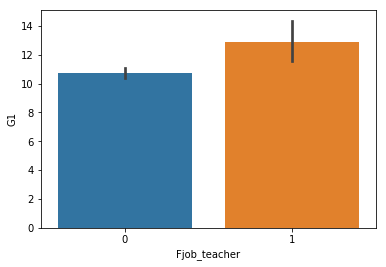

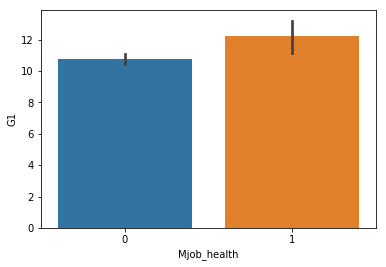

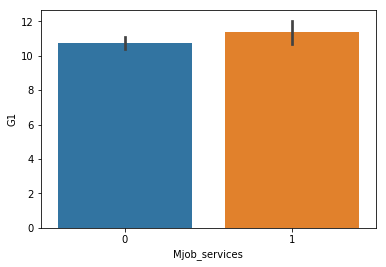

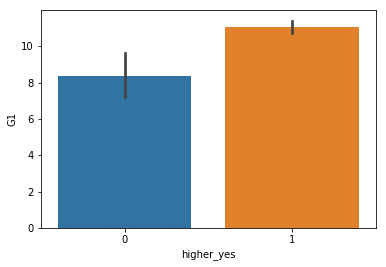

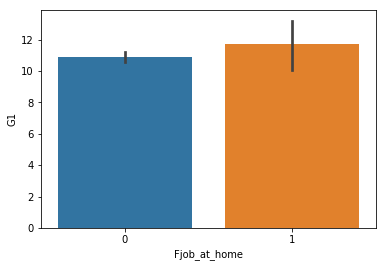

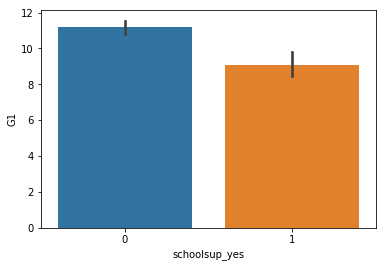

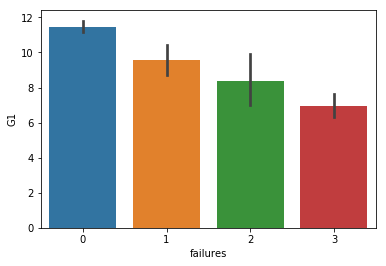

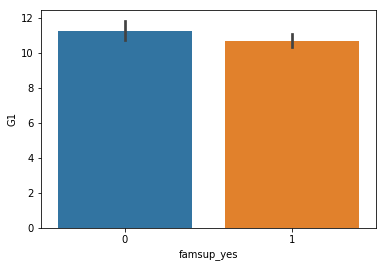

In [398]:
for var in ['Fjob_teacher','Mjob_health','Mjob_services','higher_yes','Fjob_at_home','schoolsup_yes','failures','famsup_yes']:
    sns.barplot(x=mat_dummies[var], y=mat_dummies['G1'],orient='v')
    plt.show()

C:\Users\Den\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


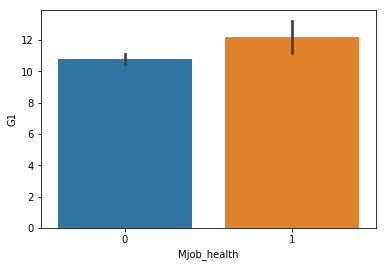

In [397]:
sns.barplot(x=mat_dummies['Mjob_health'], y=mat_dummies['G1'],orient='v')
plt.show()

C:\Users\Den\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


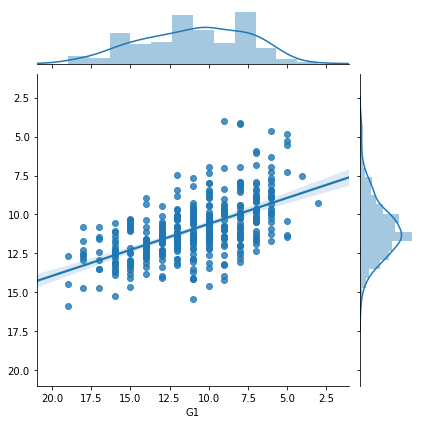

In [202]:
sns.jointplot(mat_dummies['G1'], reg_ridge.predict(mat_dummies[mat_dummies.columns.difference(vars_to_remove)]),xlim=21, ylim=21, kind='reg' )

In [374]:
data_for_analysis = mat_dummies.copy()
data_for_analysis['reg_pred'] = reg_ridge.predict(data_for_analysis[data_for_analysis.columns.difference(vars_to_remove)])

In [375]:
vars_to_remove.append('reg_pred')

C:\Users\Den\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


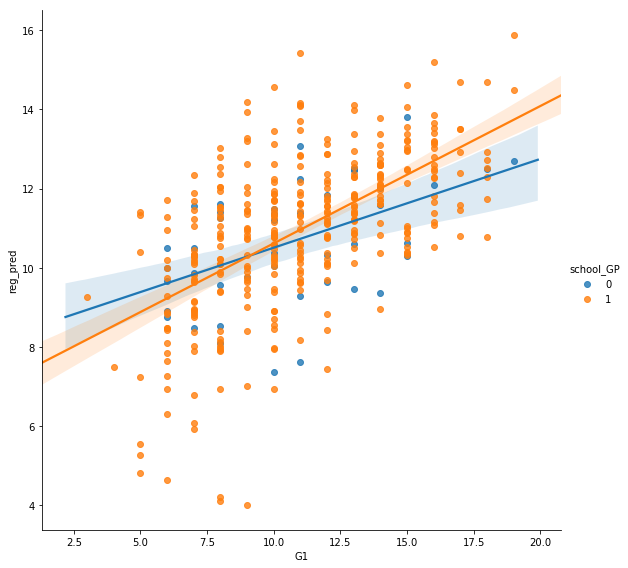

In [358]:
sns.lmplot(x='G1', y='reg_pred', data=data_for_analysis, hue='school_GP',aspect=1,height=8)

In [376]:
print('Variance score for GP: %.2f' % r2_score(data_for_analysis[data_for_analysis['school_GP'] == 1]['G1'], data_for_analysis[data_for_analysis['school_GP'] == 1]['reg_pred']))

Variance score for GP: 0.34


In [377]:
print('Variance score for MS: %.2f' % r2_score(data_for_analysis[data_for_analysis['school_GP'] == 0]['G1'], data_for_analysis[data_for_analysis['school_GP'] == 0]['reg_pred']))

Variance score for MS: 0.25


## Random Forest
### Dataset have a lot of categorical variables, so maybe tree-based algorythms can improve the score

In [378]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [379]:
vars_to_remove

['Pstatus_A',
 'activities_yes',
 'school_GP',
 'Mjob_teacher',
 'Fjob_services',
 'reason_course',
 'nursery_yes',
 'G1',
 'reg_pred']

In [380]:
#there are not too much observations in our dataset, so test data should be more than 10%. I take 40%
X_train, X_test, y_train, y_test = train_test_split(mat_dummies[mat_dummies.columns.difference(vars_to_remove)], mat_dummies['G1'], test_size=0.4, random_state=18)

In [381]:
reg_rf = RandomForestRegressor(max_depth=3
                               ,n_estimators=10
                               ,max_features='log2'
                               ,criterion='mse'
                               ,min_samples_split=15
                               , random_state=18)

In [382]:
reg_rf.fit(X_train, y_train)
print('Variance score TRAIN: %.2f' % reg_rf.score(X_train, y_train))
print('Variance score TEST: %.2f' % reg_rf.score(X_test, y_test))

Variance score TRAIN: 0.23
Variance score TEST: 0.17


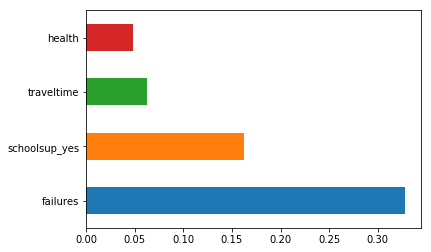

In [383]:
feat_importances = pd.Series(reg_rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(4).plot(kind='barh')

## Decision tree

In [384]:
from sklearn.tree import DecisionTreeRegressor

On train dataset we see that tree with "max_depth=6" is closer, than "max_depth=3". Let's check it with test dataset

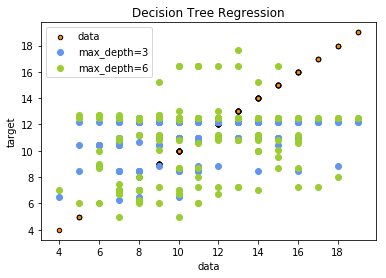

In [386]:
# Fit regression model
reg_tree1 = DecisionTreeRegressor(max_depth=3)
reg_tree2 = DecisionTreeRegressor(max_depth=6)
reg_tree1.fit(X_train, y_train)
reg_tree2.fit(X_train, y_train)

# Predict
y_1 = reg_tree1.predict(X_test)
y_2 = reg_tree2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(y_test, y_test, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.scatter(y_test, y_1, color="cornflowerblue", label="max_depth=3")
plt.scatter(y_test, y_2, color="yellowgreen", label="max_depth=6")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

On test dataset we another picture. Tree with max_depth = 6 is overfitted and this is the reason why on test dataset it shows worse results. Let's prove it by r2 score

In [387]:
print('Variance score of 3 depth tree on TRAIN : %.2f' % reg_tree1.score(X_train, y_train))
print('Variance score of 3 depth tree on TEST : %.2f' % reg_tree1.score(X_test, y_test))

print('Variance score of 6 depth tree on TRAIN : %.2f' % reg_tree2.score(X_train, y_train))
print('Variance score of 6 depth tree on TEST : %.2f' % reg_tree2.score(X_test, y_test))

Variance score of 3 depth tree on TRAIN : 0.25
Variance score of 3 depth tree on TEST : 0.09
Variance score of 6 depth tree on TRAIN : 0.62
Variance score of 6 depth tree on TEST : -0.34


In [388]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source

In [389]:
graph = Source(tree.export_graphviz(reg_tree1,out_file='reg_tree1',
                                    rounded=True,proportion = True,
                                    feature_names = X_train.columns, 
                                    precision  = 2,
                                    filled = True                         
                                   )
              )

In [333]:
tree.export_graphviz(reg_tree1,out_file='tree_3depth.dot', feature_names=) 

C:\Users\Den\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\tree\export.py:399: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


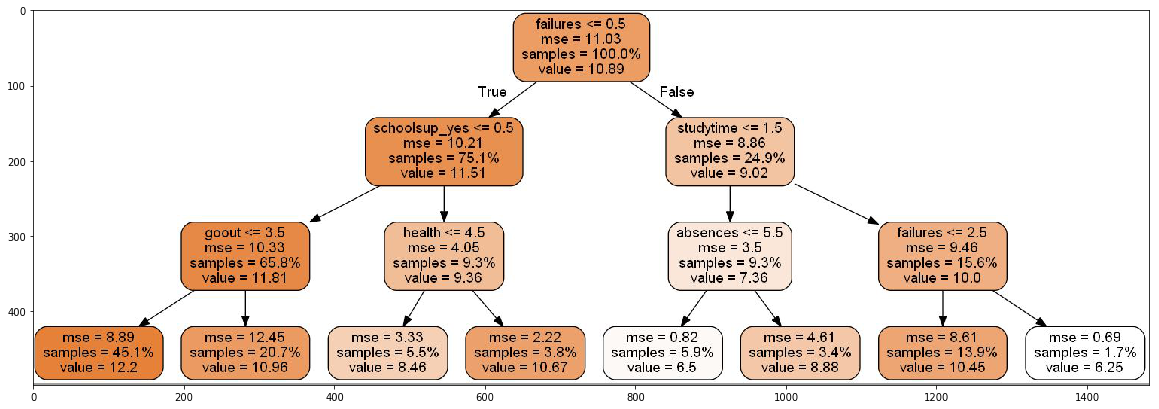

In [394]:
from pylab import imread,subplot,imshow,show
plt.figure(figsize=(20,10))
image = imread('tree.jpg')
plt.imshow(image)

So we found segments where  our prediction is quite good (mse <5)

* the top variable (in tree) is "failures".
* if "failures" = 1 and studytime <= 1 then predicted value 7.36 and mse is 3.5 which is quite good result.
* if "failures" = 1 and studytime <= 1 and absences <= 5 then mse = 0.82 (but share of subsegment is 6%) 

C:\Users\Den\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


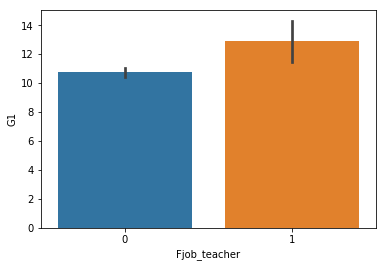

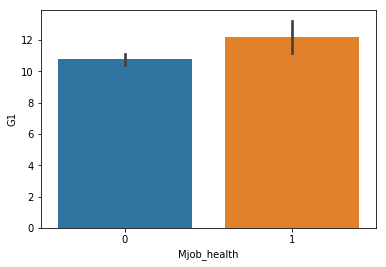

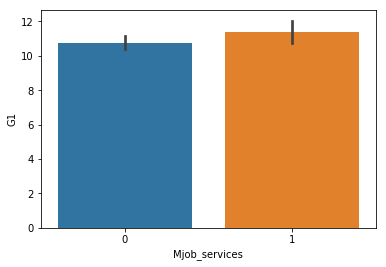

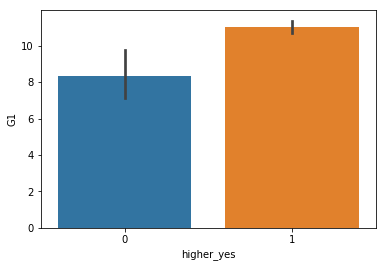

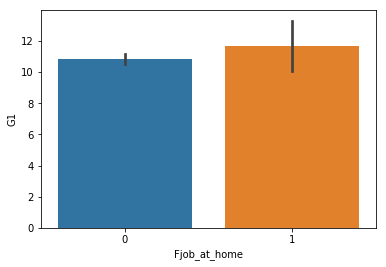

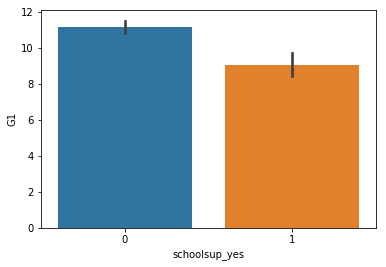

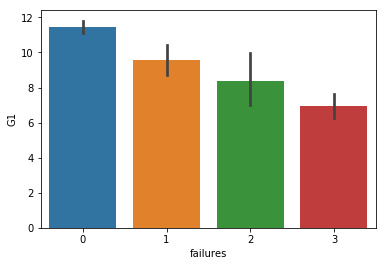

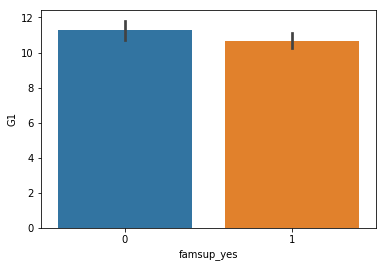

In [399]:
for var in ['Fjob_teacher','Mjob_health','Mjob_services','higher_yes','Fjob_at_home','schoolsup_yes','failures','famsup_yes']:
    sns.barplot(x=mat_dummies[var], y=mat_dummies['G1'],orient='v')
    plt.show()

Conclusions:

* if Fjob = teacher or = at home, then it's positively affects on G1
* the best categoty for Mjob is services
* students with idea about higher degree have higher G1
* students with schoolsup = 0 leads to higher G1, BUT we can't tell that schoolsup leads to lower G1. It would be wrong point